Importing Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


Data Collection and Processing

In [4]:
#loading the csv datasets to pandas dataframe
gold_data=pd.read_csv('/content/gld_price_data.csv')

In [5]:
#printing the first 5 rows of the dataset
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
#printing the no. of rows and columns in dataset
gold_data.shape

(2290, 6)

In [7]:
# print the last 5 rows of the dataset
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [8]:
#getting some basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [10]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation: tells us about the which column is related to which column 
    
    There are two types of correlation
    1)POSITIVE correlation: Two features (variables) can be positively correlated with each other.
     It means that when the value of one variable increase then the value of the other variable(s) also increases.
    2)Negative Correlation: Negative correlation means the higher the value of one variable the lower is the value of another variable.
     Simplest example: Your spending and your savings are negatively correlated. 

In [12]:
correlation=gold_data.corr()

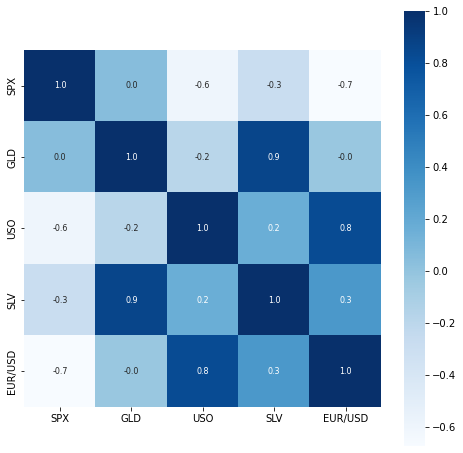

In [13]:
# constructing the heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [14]:
# correlation VALUES of gld
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


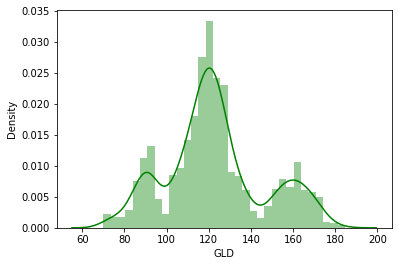

In [15]:
#CHECKING the distribution of the gold price
sns.distplot(gold_data['GLD'],color='green')

Splitting the Features and Targets

In [16]:
# here the target is nothing but the gold price and the features are the other columns of the dataset
X=gold_data.drop(['Date','GLD'], axis=1) # whenever we are dropping the column we make axis=1 and while dropping the row value of axis should be 0
Y=gold_data['GLD']

In [16]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [17]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into training data and test data

In [18]:
X_train, X_test, Y_train,Y_test = train_test_split(X,Y , test_size=0.2, random_state=2)

Model Training:RandomForestRegressor

In [19]:
# RandomRegressorForest is the model which consist of more than one model jon together
# n_estimators: This is the number of trees you want to build before taking the maximum voting or averages of predictions. 
# Higher number of trees give you better performance but makes your code slower.

regressor= RandomForestRegressor(n_estimators=100)

In [20]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model evaluation

In [21]:
# prediction on test data
test_data_prediction=regressor.predict(X_test)
print(test_data_prediction)

[168.76159975  81.87949975 116.20550028 127.51280076 120.92210106
 154.72829726 150.3479985  126.18710024 117.63669864 125.9617009
 116.47450095 171.81450088 141.25429828 167.89909822 115.12670043
 117.67430034 137.67080307 169.89570095 158.54100259 158.27909947
 155.04900018 125.45230002 175.50469931 156.88330342 125.12080052
  93.82859983  77.54700039 120.59140033 119.18719975 167.43019949
  88.27880036 125.18999978  91.08190074 117.64110029 121.16379926
 136.11740167 115.37100135 114.65740037 148.1626993  107.08220116
 104.32360233  87.16319778 126.54219994 118.07470028 152.89159886
 119.52720005 108.24800022 108.10059819  93.28920036 127.24279746
  74.95230032 113.53279919 121.067      111.2723992  118.87799907
 120.26539905 160.65209942 167.86650101 146.93619656  85.88869859
  94.26510038  86.91559884  90.36920016 118.80010079 126.47570066
 127.62120021 170.14750001 122.20959918 117.29319873  98.40149994
 168.18350059 143.25249839 132.17420233 121.12870212 121.63299932
 119.565400

In [22]:
# R squared error
error_score =metrics.r2_score(Y_test,test_data_prediction)
print("R squared error: ",error_score)

R squared error:  0.9895802331085859


Compare The actual values and Predicted values in plot

In [23]:
Y_test=list(Y_test)


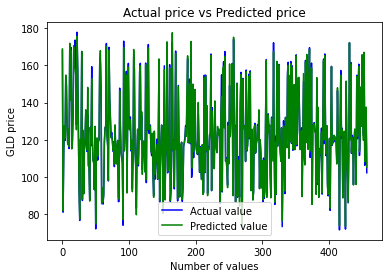

In [28]:
plt.plot(Y_test, color='blue' , label='Actual value')
plt.plot(test_data_prediction, color='green',label='Predicted value')
plt.title('Actual price vs Predicted price')
plt.xlabel('Number of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()